# Маркетинговый анализ с использованием метода bootstrap ("бутстрап")

<span style='font-size: 14pt'>Для этого задния я буду использовать базу данных сети продуктовых магазинов, скачанную с сайта kaggle</span>  
  
Этот датасет содержит информацию о 2240 клиентах и о шести рекламных кампаниях, причём первые пять рекламных акций - подготовительные, а последняя - целевая.  
   
<span style='font-size: 14pt'>Поля, которые содержит таблица:</span>
<style>
.blue-bg { background-color: #AEEDF5; }
</style>
1. Реакция клиентов на рекламные акции
- AcceptedCmp1 — принял ли клиент предложение в <span class='blue-bg'>первой</span> кампании, 0 или 1
- AcceptedCmp2 — принял ли клиент предложение во <span class='blue-bg'>второй</span> кампании, 0 или 1
- AcceptedCmp3 — принял ли клиент предложение в <span class='blue-bg'>третьей</span> кампании, 0 или 1
- AcceptedCmp4 — принял ли клиент предложение в <span class='blue-bg'>четвёртой</span> кампании, 0 или 1
- AcceptedCmp5 — принял ли клиент предложение в <span class='blue-bg'>пятой</span> кампании, 0 или 1
- Response — принял ли клиент предложение в <span class='blue-bg'>последней (целевой)</span> кампании, 0 или 1

2. Информация о клиентах
- Year_Birth - дата рождения
- Dt_Customer - дата, когда клиент стал "известным" для компании, например получил карту лояльности или зарегестрировался на сайте
- Education — уровень образования клиента
- Marital_Status — семейное положение клиента
- Kidhome — количество маленьких детей в семье клиента
- Teenhome — количество подростков в семье клиента
- Income — годовой доход домохозяйства клиента
- Z_CostContact - сколько стоит один контакт с клиентом
- Z_Revenue - выручка с кклиента после его отклика хотя бы на одну из рекламных акций

3. Информация о тратах клиента на определённые виды продуктов
- MntFishProducts — сумма, потраченная на <span class='blue-bg'>рыбную продукцию</span> за последние 2 года
- MntMeatProducts — сумма, потраченная на <span class='blue-bg'>мясную продукцию</span> за последние 2 года
- MntFruits — сумма, потраченная на <span class='blue-bg'>фруктовую продукцию</span> за последние 2 года
- MntSweetProducts — сумма, потраченная на <span class='blue-bg'>сладкие продукты</span> за последние 2 года
- MntWines — сумма, потраченная на <span class='blue-bg'>винную продукцию</span> за последние 2 года
- MntGoldProds — сумма, потраченная на <span class='blue-bg'>золотые изделия</span> за последние 2 года

4. Поведение клиента
- Complain — 1, если клиент жаловался в течение последних 2 лет
- NumDealsPurchases — количество покупок, совершённых <span class='blue-bg'>со скидкой</span>
- NumCatalogPurchases — количество покупок, совершённых <span class='blue-bg'>по каталогу</span>
- NumStorePurchases — количество покупок, совершённых <span class='blue-bg'>непосредственно в магазинах</span>
- NumWebPurchases — количество покупок, совершённых <span class='blue-bg'>через веб-сайт компании</span>
- NumWebVisitsMonth — количество посещений веб-сайта компании за последний месяц
- Recency — количество дней с момента последней покупки

In [2]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import kstest, norm

In [3]:
# импортируем данные
data = pd.read_csv('/Users/alferova_tv/Documents/Statistics/marketing/archive/marketing_campaign.csv', sep=';')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [21]:
info_df = pd.DataFrame({
    "Column": data.columns,
    "DType": data.dtypes.astype(str),
    "Missing": data.isna().sum(),
    "Unique": data.nunique()
})
info_df.reset_index(drop=True)

,Column,DType,Missing,Unique
0,ID,int64,0,2240
1,Year_Birth,int64,0,59
2,Education,object,0,5
3,Marital_Status,object,0,8
4,Income,float64,24,1974
5,Kidhome,int64,0,3
6,Teenhome,int64,0,3
7,Dt_Customer,object,0,663
8,Recency,int64,0,100
9,MntWines,int64,0,776


## I. Полупараметрический bootstrap

Используем его в регрессионном анализе. Проверим, есть ли зависимость между количеством детей в семье клиента и суммой, потраченной им на сладкие продукты за последние 2 года.  
Интуитивно хочется предположить, что такая зависимость есть: больше детей - больше сладостей (линейная регрессия)

То есть, предполагаем, что существует такая функция y = 𝛽₀ + 𝛽₁x₁ + ⋯ + 𝛽ᵣxᵣ + 𝜀, где y - сумма трат на сладкое, x - количество детей в семье, 𝛽 - коэффициенты, 𝜀 - погрешность

In [3]:
data['num_children'] = data['Kidhome'] + data['Teenhome'] # новый столбец - общее количество детей

# создаём массивы из наших полей
x = np.array(data['num_children']).reshape(-1, 1) # независимая переменная
y = np.array(data['MntSweetProducts']) # зависимая переменная

model = LinearRegression().fit(x, y) # модель линейной регрессии
beta0 = model.intercept_
beta1 = model.coef_[0]

# посмотрим коэффициенты модели
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])

y_pred = model.predict(x)

Intercept (β0): 47.05801280479697
Slope (β1): -21.037552222989763


Итерпретация:
Результат получился неожиданный: количество детей, вопреки интуитивным догадкам, уменьшает траты клиента на сладкое.  
Или буквально: траты на сладкое = 47.06  –  21.04 * число_детей
- средние траты на сладости у клиента без детей - примерно 47
- каждый дополнительный ребёнок уменьшает траты на сладости примерно на 21

Такой результат может говорить о том, что семьи с детьми больше экономят и покупают в основном базовые продукты (молоко, хлеб, мясо).
Также возможно, что в данных просто мало детей

In [4]:
print(data.groupby(['num_children'])['ID'].count())
print()
print(data.groupby('num_children')['MntSweetProducts'].mean())

num_children
0     638
1    1128
2     421
3      53
Name: ID, dtype: int64

num_children
0    53.061129
1    20.295213
2     8.370546
3     6.622642
Name: MntSweetProducts, dtype: float64


И правда, троих детей имеют всего 2,3% клиентов, и с увеличением детей уменьшается средняя сумма трат на сладости

In [5]:
# посмотрим качество модели
print(model.score(x, y))

0.14679404935587625


Количество детей объясняет примерно 14.7% вариации трат на сладкие продукты. Есть слабая зависимость, но для маркетинговых данных, где поведение клиента зависит от множества факторов, это нормально.  
Вывод: есть зависимость, но она слабая

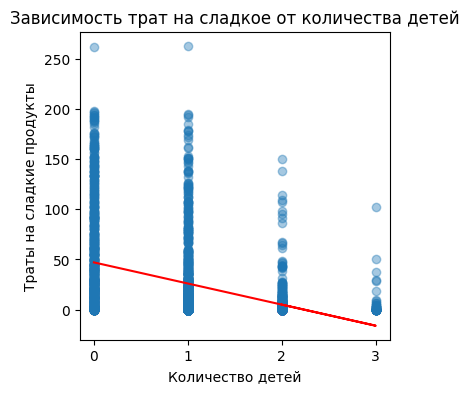

In [6]:
# построим диаграмму рассеяния с линией регрессии
plt.figure(figsize=(4,4))

plt.scatter(x, y, alpha=0.4)

plt.plot(x, y_pred, color='red')

plt.xticks([0, 1, 2, 3])
plt.xlabel('Количество детей')
plt.ylabel('Траты на сладкие продукты')
plt.title('Зависимость трат на сладкое от количества детей') 

plt.show()

Теперь усилим характеристики регрессии с помощью полупараметрического бутстрапа.  
Для данного случая он подходиит больше других, так как x представляет собой несколько категорий (0, 1, 2, 3) и в бутстрап-выборках частоты категорий будут случайными, это будет искажать реальное распределение. 
В полупараметрическом бутстрапе мы будем бутстрапировать не сами выборки, а ошибку 𝜀,

Пошагово:<br>
1. Находим остатки 𝜀<br>
2. Перемешиваем остатки<br>
3. Создаём новые значения y\* = ŷ + ε\*<br>
4. Обучаем регрессию на данных (x, y\*)<br>
5. Сохраняем β₁\*<br>
6. Повторяем 2000<br>

В итоге получаем:<br>
- распределение β₁<br>
- доверительный интервал<br>
- вероятность того, что β₁ < 0<br>

In [7]:
residuals = y - y_pred # остатки модели

B = 2000
boot_betas = []
n = len(y)

for _ in range(B):
    # случайная выборка остатков с повторением
    eps_star = np.random.choice(residuals, size=n, replace=True)
    
    # генерируем новые y*
    y_star = y_pred + eps_star
    
    # обучаем регрессию на новых данных
    model_star = LinearRegression().fit(x, y_star)
    boot_betas.append(model_star.coef_[0])

boot_betas = np.array(boot_betas)

# Доверительный интервал
ci_low = np.percentile(boot_betas, 2.5)
ci_high = np.percentile(boot_betas, 97.5)

print('95% бутстрапный доверительный интервал для β1:', (ci_low, ci_high))
print('P(β1 < 0):', np.mean(boot_betas < 0))

95% бутстрапный доверительный интервал для β1: (np.float64(-23.13377817646093), np.float64(-18.973721018582765))
P(β1 < 0): 1.0


Интервал полностью отрицательный и довольно узкий.  
Ни в одной бутстрап-выборке коэффициент β1 не оказался большим либо равным 0

Посроим график распределения коэффииентов β1

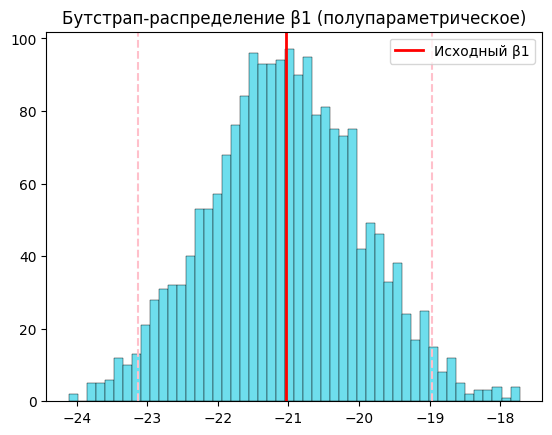

In [8]:
plt.hist(boot_betas, bins=50, edgecolor='black', linewidth=0.3, color='#6EDEED')
plt.axvline(beta1, color='red', linewidth=2, label='Исходный β1')
plt.axvline(ci_low, color='pink', linestyle='--')
plt.axvline(ci_high, color='pink', linestyle='--')
plt.title("Бутстрап-распределение β1 (полупараметрическое)")
plt.legend()
plt.show()

#### Резюме
>В рамках линейной модели и имеющегося набора данных увеличение количества детей статистически значимо связано со снижением трат на сладкие продукты. Однако это не доказывает причинно-следственную связь и может быть результатом других факторов

## II. Непараметрический бутстрап

Теперь проверим похожую гипотезу с тратами на вино. Проверим, есть ли связь между семейным положением и суммой, потраченной на винную продукцию за последние 2 года.  
Опять же, интуитивно хочется предположить, что одинокие люди чаще покупают алкоголь, чем семейные

<span style='font-size: 9pt'>Список статусов:</span>
> <span style='font-size: 9pt'>Single - одинок, Together - встречается, Married - женат, Divorced - разведён, Widow - вдова/вдовец, Alone - ?, Absurd - ?, YOLO - "живу один раз"</span></br>
</br>
<p>Итак,  проверим следующие гипотезы:</p>

**H₀: Семейное положение не влияет на траты на винную продукцию**</br>

**H₁: Семейное положение влияет на траты на винную продукцию**

Для этого буду использовать дисперсионный анализ или ANOVA, алгоритм взяла из книги Сары Бослаф "Статистика для всех" 

Зависимая переменная y - сумма, потраченная на винную продукцию (непрерывная)</br>
Независимая переменная x - семейное положение (категориальная)</br>
Значения y не зависят друг от друга</br>
</br>
\- это подходит для ANOVA

Ещё одно условие - приблизительно нормальное распределение y в каждой группе. Проверим с помощью ктритерия Колмогорова-Смирнова

In [35]:
for status in data['Marital_Status'].unique(): 
    subset = data[data['Marital_Status'] == status]['MntWines']
    
    # слишком маленькие группы пропустим
    if len(subset) < 10:
        print(status, "— мало данных (n < 10)")
        continue
    
    mu, sigma = subset.mean(), subset.std(ddof=1)

    if sigma == 0:
        print(status, "— все значения одинаковы, тест не применим")
        continue

    stat, p = kstest(subset, 'norm', args=(mu, sigma))
    print(f'{status}, {p >= 0.05}, p = {p}')

Single, False, p = 3.3976891725662063e-16
Together, False, p = 7.873001456029385e-17
Married, False, p = 3.78115980025644e-27
Divorced, False, p = 1.1638620433949211e-06
Widow, True, p = 0.10980979545429914
Alone — мало данных (n < 10)
Absurd — мало данных (n < 10)
YOLO — мало данных (n < 10)


Получилось, что только у группы со стаусом вдова/вдовец траты на винную продукцию распределены приблизительно нормально. У четырёх первых групп p-значения намного меньше границы, также размеры групп не одинаковые. Скорее всего распределение трат на винную продукцию сильно скошено, в таком случае ANOVA будет не достоверным. 

Посмотрим коэффициент ассиметрии трат на винную продукцию

In [36]:
from scipy.stats import skew
x = data["MntWines"].dropna()
print("Skewness:", skew(x))

Skewness: 1.1749830708938132


И правда, есть длинный хвост справа: много людей покупают мало вина, но есть небольшая группа людей, которые покупают много вина

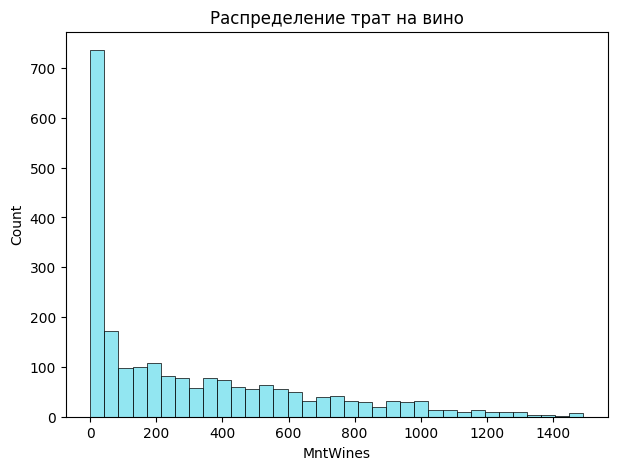

In [45]:
# построим гистограмму распределения
plt.figure(figsize=(7,5))
sns.histplot(data['MntWines'], kde=False, bins=35, linewidth=0.5, edgecolor='black', color='#6EDEED')
plt.xlabel('MntWines')
plt.ylabel('Count')
plt.title('Распределение трат на вино')
plt.show()

Используем непараметрический бутстрап, чтобы проверить

**H₀: ​μ (мат. ожидание) по всем группам одинаковые** </br>
  
**H₁: Хотя бы одна группа отличается**


Бутстрап позволит оценить распределение статистики F (или разности средних) без предположения о нормальности.  
Идея в том, чтобы оставить траты такими как есть, но случайным образам подставлять к ним названия групп много раз. То есть смоделировать такую ситуацию, в которой нулевая гипотеза истинна.   
После перестановок посчитаем F-статистику она покажет, какими могут быть различия случайно, без разделения по группам. Если группы реально не влияют,
то их названия можно менять местами — ничего не изменится. Если же эффект есть, то реальная F-статистика окажется намного больше, чем F-статистики из перестановочных выборок.   

Отсюда определим p-значение как p_value = P(Fслучайная ​≥ Fреальная​)

In [5]:
df = data[['Marital_Status', 'MntWines']].copy() 
df = df[df['Marital_Status'].isin(['Single','Together','Married','Divorced','Widow'])] # исключаем слишком маленькие группы, чтобы не искажать тест

groups = [df[df['Marital_Status'] == status]['MntWines'].values for status in df['Marital_Status'].unique()] # массив со списками трат для каждой группы

from scipy.stats import f_oneway
F_real = f_oneway(*groups)[0] # однофакторный ANOVA на реальных данных (реальная F-статистика)

# 2. Перестановочный бутстрап
B = 5000
F_boot = []

for _ in range(B):
    shuffled = np.random.permutation(df['Marital_Status']) # перемешиваем метки групп
    df['shuffled_group'] = shuffled # добавляем в датафрейм перемешанные группы
    
    groups_shuffled = [df[df['shuffled_group'] == status]['MntWines'].values for status in df['Marital_Status'].unique()] # массив со списками трат для каждой группы после перемешивания
    
    F = f_oneway(*groups_shuffled)[0] # считаем F-статистику для перемешанных данных
    F_boot.append(F) # сохраняем значение F-статистики

F_boot = np.array(F_boot)

# 3. p-value
p_value = np.mean(F_boot >= F_real) # доля случаев, когда F-статистика из бутстрапа больше или равна реальной

print("Real F-statistic:", F_real)
print("Bootstrap p-value:", p_value)

Real F-statistic: 1.25343747865223
Bootstrap p-value: 0.2826


Итак, наше p-значение получилось напиного больше 0,05, а значит нет оснований отвергать нулевую гипотезу о том, что различий между группами нет.  
Буквально ~28% случайных перестановок дали F-статистику не меньше, чем реальная, значит различия между группами легко возникают из-за простой случайности.  
F-статистика в данном случае - это отношение дисперсий между группами и внутри групп, то есть значение 1,25 говорит о том, что группы не сильно отличаются

#### Резюме
>Статистически значимых различий трат на вино между marital status нет. Семейное положение НЕ оказывает заметного влияния на траты на вино у клиентов в этом датасете. 